In [37]:
#Sourcing the data
import pandas as pd
import collections
import numpy as np
from nltk.corpus import inaugural 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#Creating an dictionary to identify Presidents name,Party by term year.
presidentname_year={'1789':['Other','George Washington'],
 '1793':['Other','George Washington'],
 '1797':['Other','John Adams'],
 '1801':['Other','Thomas Jefferson'],
 '1805':['Other','Thomas Jefferson'],
 '1809':['Other','James Madison'],
 '1813':['Other','James Madison'],
 '1817':['Other','James Monroe'],
 '1821':['Other','James Monroe'],
 '1825':['Other','John Quincy Adams'],
 '1829':['Democrat','Andrew Jackson'],
 '1833':['Democrat','Andrew Jackson'],
 '1837':['Democrat','Martin Van Buren'],
 '1841':['Other','William Henry Harrison'],
 '1845':['Democrat','James K. Polk'],
 '1849':['Other','Zachary Taylor'],
 '1853':['Democrat','Franklin Pierce'],
 '1857':['Democrat','James Buchanan'],
 '1861':['Republican','Abraham Lincoln'],
 '1865':['Republican','Abraham Lincoln'],
 '1869':['Republican','Ulysses S. Grant'],
 '1873':['Republican','Ulysses S. Grant'],
 '1877':['Republican','Rutherford B. Hayes'],
 '1881':['Republican','James A. Garfield'],
 '1885':['Democrat','Grover Cleveland'],
 '1889':['Republican','Benjamin Harrison'],
 '1893':['Democrat','Grover Cleveland'],
 '1897':['Republican','William McKinley'],
 '1901':['Republican','William McKinley'],
 '1905':['Republican','Theodore Roosevelt'],
 '1909':['Republican','William Howard Taft'],
 '1913':['Democrat','Woodrow Wilson'],
 '1917':['Democrat','Woodrow Wilson'],
 '1921':['Republican','Warren G. Harding'],
 '1925':['Republican','Calvin Coolidge'],
 '1929':['Republican','Herbert Hoover'],
 '1933':['Democrat','Franklin Roosevelt'],
 '1937':['Democrat','Franklin Roosevelt'],
 '1941':['Democrat','Franklin Roosevelt'],
 '1945':['Democrat','Franklin Roosevelt'],
 '1949':['Democrat','Harry S. Truman'],
 '1953':['Republican','Dwight D. Eisenhower'],
 '1957':['Republican','Dwight D. Eisenhower'],
 '1961':['Democrat','John F. Kennedy'],
 '1965':['Democrat','Lyndon B. Johnson'],
 '1969':['Republican','Richard M. Nixon'],
 '1973':['Republican','Richard M. Nixon'],
 '1977':['Democrat','Jimmy Carter'],
 '1981':['Republican','Ronald Reagan'],
 '1985':['Republican','Ronald Reagan'],
 '1989':['Republican','George Bush'],
 '1993':['Democrat','Bill Clinton'],
 '1997':['Democrat','Bill Clinton'],
 '2001':['Republican','George W. Bush'],
 '2005':['Republican','George W. Bush'],
 '2009':['Democrat','Barack Obama'],
 '2013':['Democrat','Barack Obama'],
 '2017':['Republican','Donald Trump']}

In [11]:
#Function to calculate vocabulary count,top 5 most frequent words used by presidents & sentiment score of the speech
stop_words = stopwords.words('english')
word_list=[]
sentiment_score=0.0
def speech_vocab_count(speech_text):
    #Removing all the special characters from the speech text
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t':
        speech_text = speech_text.replace(char, ' ')
        #Converting all the words in speech into lower case
    speech_text = speech_text.lower()
    sentiment_score=analyzer.polarity_scores(speech_text)['compound']
    word_list = word_tokenize(speech_text)
    word_list=[w for w in word_list if w not in stop_words]
    return len(set(word_list)),[word for word,cnt in collections.Counter(word_list).most_common(5)],sentiment_score

In [ ]:
analyzer = SentimentIntensityAnalyzer()
#Creating a new dataframe with specific column names
us_presidents_speeches=pd.DataFrame(columns = ["speech_vocabulary_count", "term_year", "president_name","party_name","frequent_words","sentiment_score"])
speech_vocabulary_count=[]
i=0
for k in inaugural.fileids():
    num_vocab = speech_vocab_count(inaugural.raw(k))[0]
    speech_vocabulary_count.append(int(num_vocab))       
    us_presidents_speeches.at[i,'president_name']=presidentname_year[k[0:4]][1]
    us_presidents_speeches.at[i,'frequent_words']=speech_vocab_count(inaugural.raw(k))[1]
    us_presidents_speeches.at[i,'term_year']=int(k[0:4])
    us_presidents_speeches.at[i,'party_name']=presidentname_year[k[0:4]][0]
    us_presidents_speeches.at[i,'sentiment_score']=speech_vocab_count(inaugural.raw(k))[2]
    i=i+1
us_presidents_speeches['speech_vocabulary_count']=speech_vocabulary_count

#### William Henry Harrison had highest vocabulary count in his inagural speech when compared to speeches of other presidents.

In [15]:
#President Name with highest vocabulary count
us_presidents_speeches[us_presidents_speeches['speech_vocabulary_count']==max(us_presidents_speeches['speech_vocabulary_count'])]['president_name']

13    William Henry Harrison
Name: president_name, dtype: object

#### George Washington had lowest vocabulary count in his inagural speech when compared to speeches of other presidents.

In [16]:
#President Name with lowest vocabulary count
us_presidents_speeches[us_presidents_speeches['speech_vocabulary_count']==min(us_presidents_speeches['speech_vocabulary_count'])]['president_name']

1    George Washington
Name: president_name, dtype: object

#### On an average Presidents from Republican party had higher vocabulary when compared to presidents from other parties.

In [17]:
#Mean Vocabulary count of all the presidents by party
us_presidents_speeches.groupby('party_name').speech_vocabulary_count.mean()

party_name
Democrat      618.500000
Other         697.500000
Republican    717.708333
Name: speech_vocabulary_count, dtype: float64

#### Barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in their inagural speeches

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

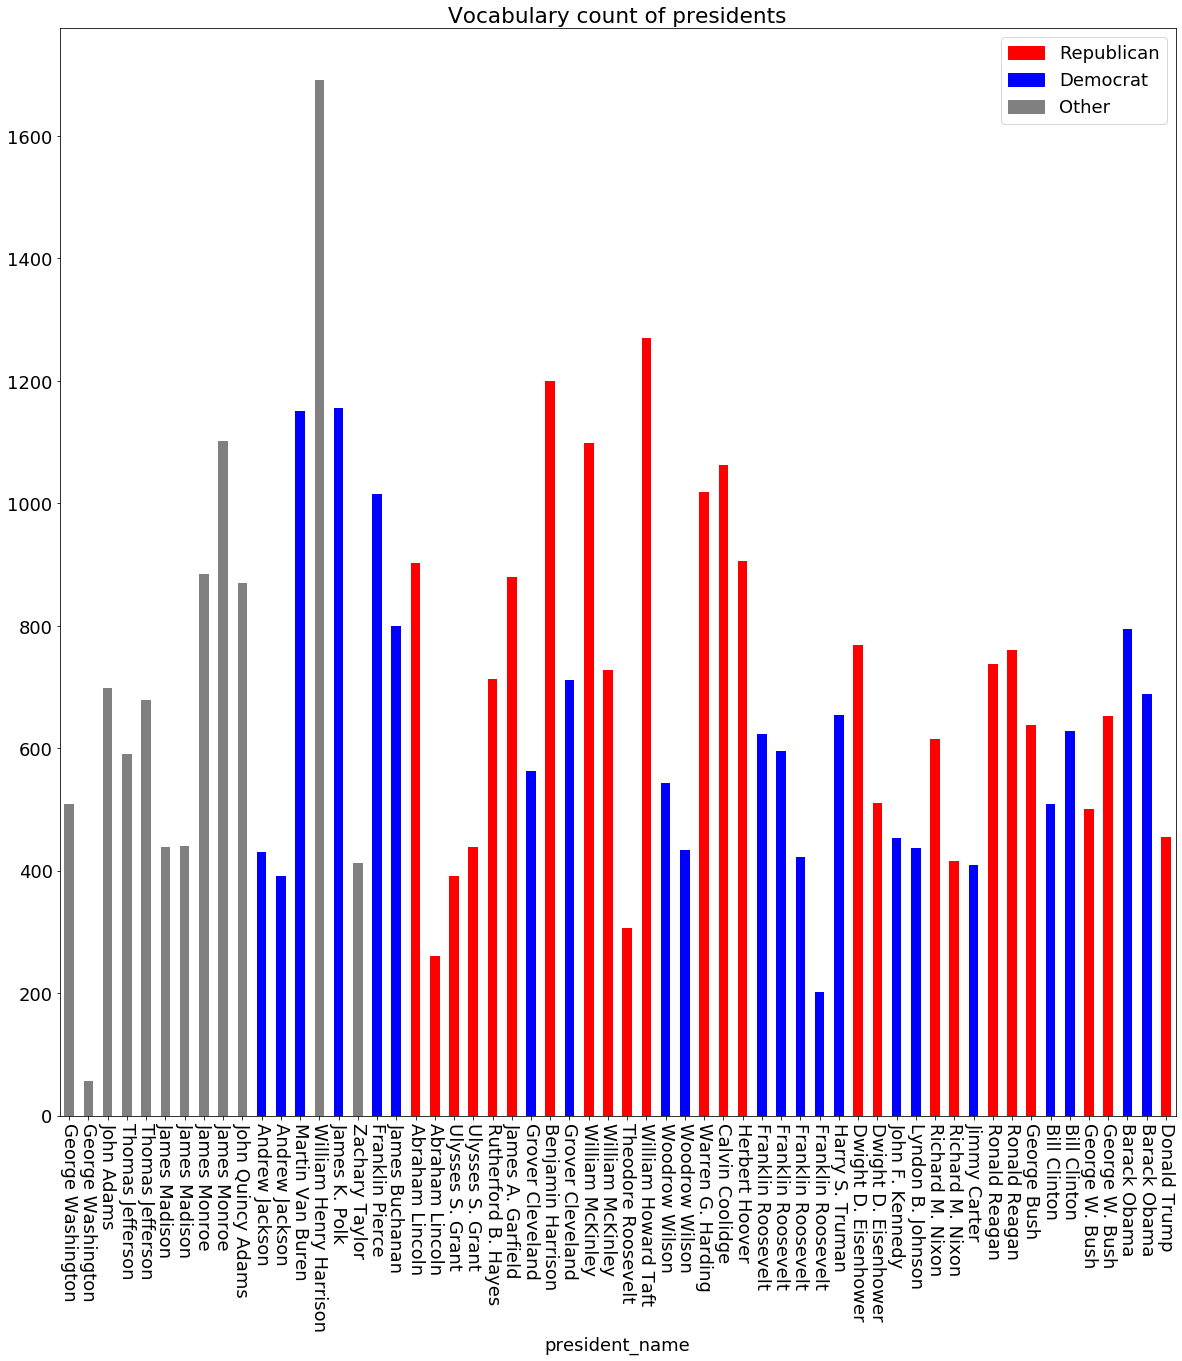

In [95]:
colors = {'Republican': 'red', 'Democrat': 'blue', 'Other': 'grey'}
us_presidents_speeches.plot(kind='bar', color=[colors[i] for i in us_presidents_speeches['party_name']],x='president_name',y='speech_vocabulary_count')
plt.title("Vocabulary count of presidents")
red_patch = mpatches.Patch(color='red', label='Republican')
blue_patch = mpatches.Patch(color='blue', label='Democrat')
grey_patch = mpatches.Patch(color='grey', label='Other')
plt.legend(handles=[red_patch,blue_patch,grey_patch])
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=270)

### Top 5 frequent words used by each president in their respective inaugural speeches

In [90]:
pd.set_option('display.max_colwidth', -1)
us_presidents_speeches[['president_name','frequent_words']]
#Few president names are being repeated since they delivered speeches during different years.

,president_name,frequent_words
0,George Washington,"[every, government, public, may, citizens]"
1,George Washington,"[shall, oath, fellow, citizens, called]"
2,John Adams,"[people, government, may, nations, country]"
3,Thomas Jefferson,"[government, us, may, fellow, citizens]"
4,Thomas Jefferson,"[public, citizens, may, fellow, state]"
5,James Madison,"[nations, public, well, country, peace]"
6,James Madison,"[war, country, united, every, british]"
7,James Monroe,"[government, great, states, people, us]"
8,James Monroe,"[great, states, would, united, war]"
9,John Quincy Adams,"[union, government, upon, country, rights]"


In [77]:
#Creating two seperate lists to identify most frequent words used by presidents in republic and democratic parties.
Republican_word_list=[]
Democrat_word_list=[]
for i in range(0, len(us_presidents_speeches)):
    if us_presidents_speeches.iloc[i]['party_name']=='Republican':
        Republican_word_list=Republican_word_list+us_presidents_speeches.iloc[i]['frequent_words']
    elif us_presidents_speeches.iloc[i]['party_name']=='Democrat':
        Democrat_word_list=Democrat_word_list+us_presidents_speeches.iloc[i]['frequent_words']

#### Set of top words used by democratic presidents which are not in common with republican presidents

In [79]:
print(list(set(Democrat_word_list)-set(Republican_word_list)))

['purpose', 'man', 'would', 'today', 'learned', 'action', 'national', 'leadership', 'institutions', 'century', 'time', 'men', 'sides', 'know', 'change', 'spirit', 'democracy', 'power', 'strength']


In [80]:
#Calculating minimum sentiment score to set lower limit on y-axis.
print(min(us_presidents_speeches[us_presidents_speeches['party_name']=='Republican']['sentiment_score']))
print(min(us_presidents_speeches[us_presidents_speeches['party_name']=='Democrat']['sentiment_score']))
print(min(us_presidents_speeches[us_presidents_speeches['party_name']=='Other']['sentiment_score']))

-0.9713
0.9978
0.5719


### Bar plot of sentiment score of presidents from republican party

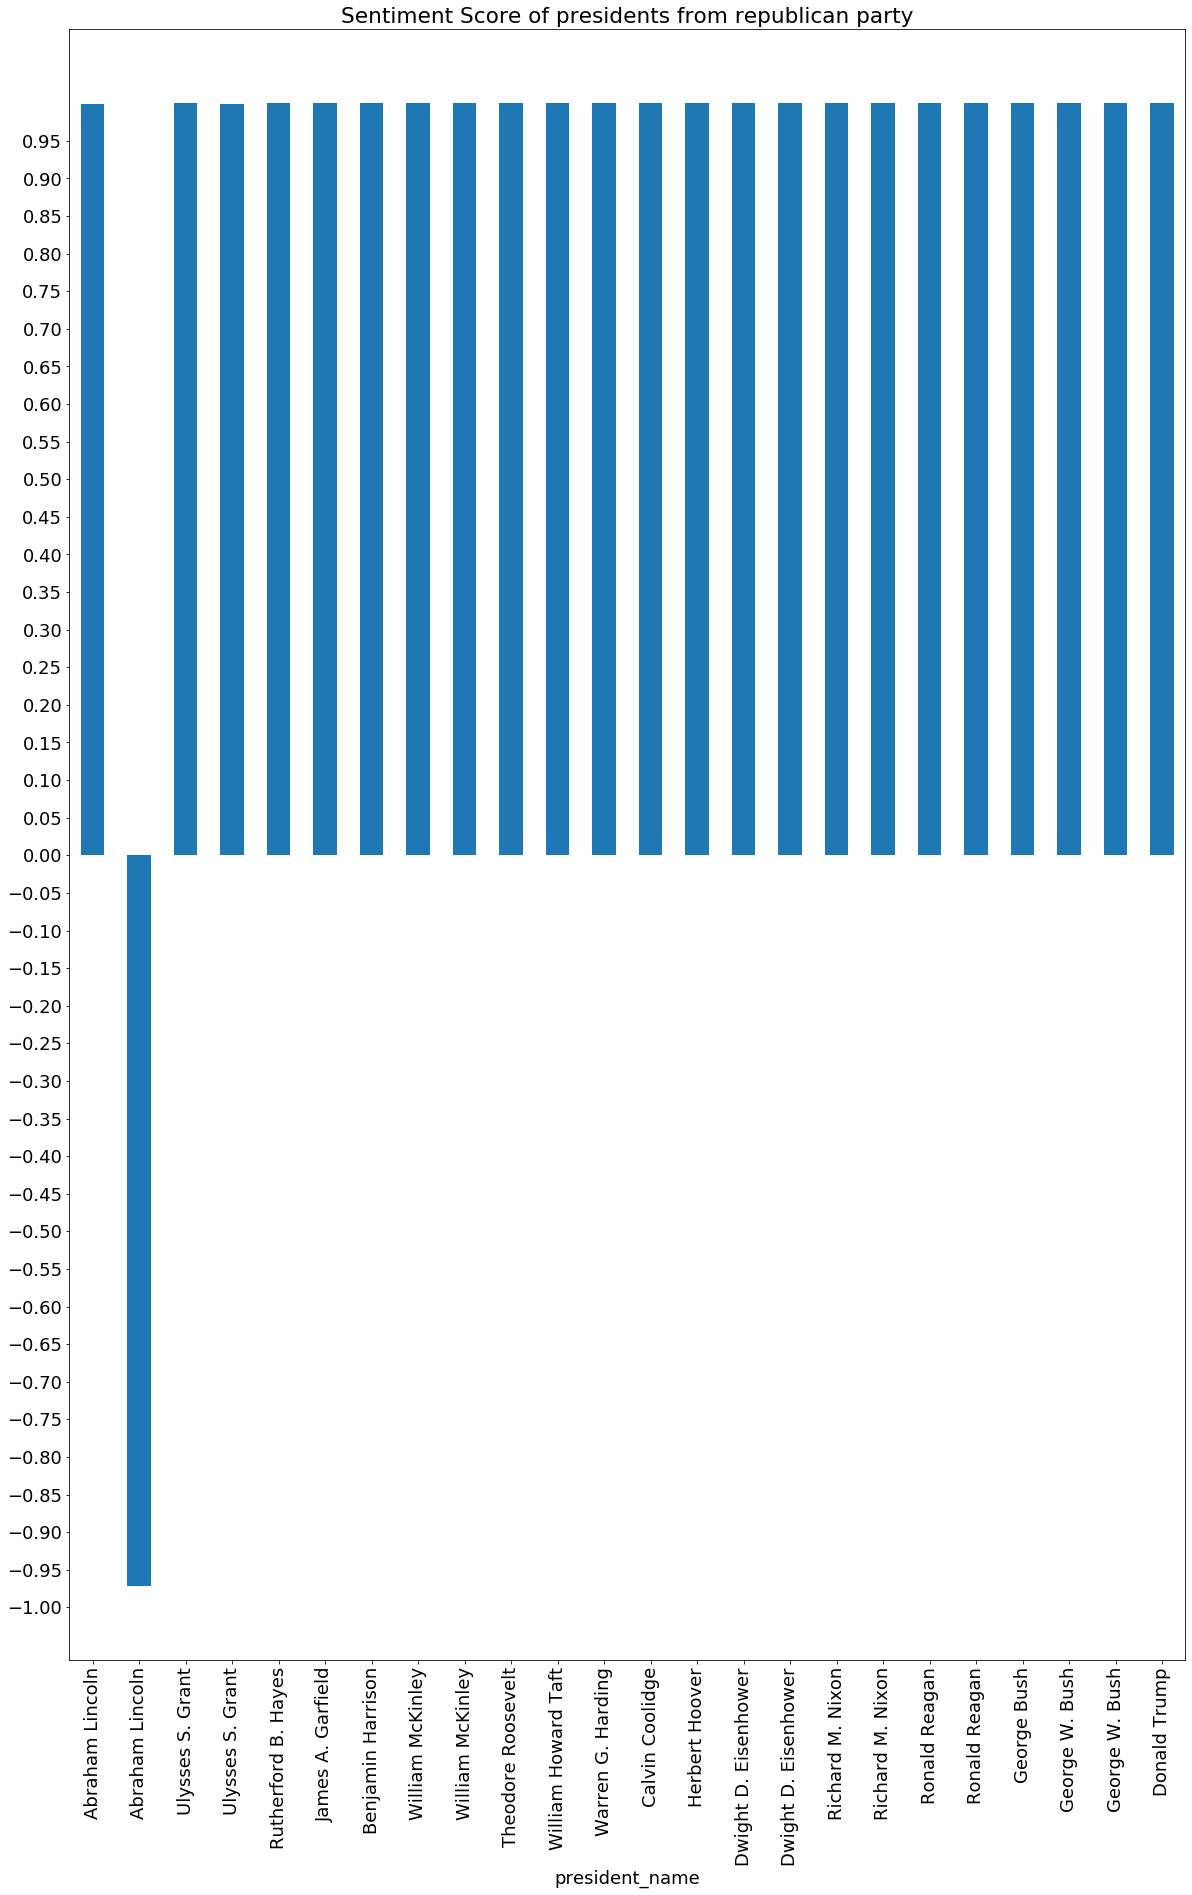

In [74]:
us_presidents_speeches[us_presidents_speeches['party_name']=='Republican'].plot(kind='bar',x='president_name',y='sentiment_score')
plt.title("Sentiment Score of presidents from republican party")
plt.rcParams["figure.figsize"] = (20,30)
axes = plt.gca()
plt.yticks(np.arange(-1,1,0.05))
plt.rcParams.update({'font.size': 18})
plt.legend().set_visible(False)

### Bar plot of sentiment score of presidents from Democrat party

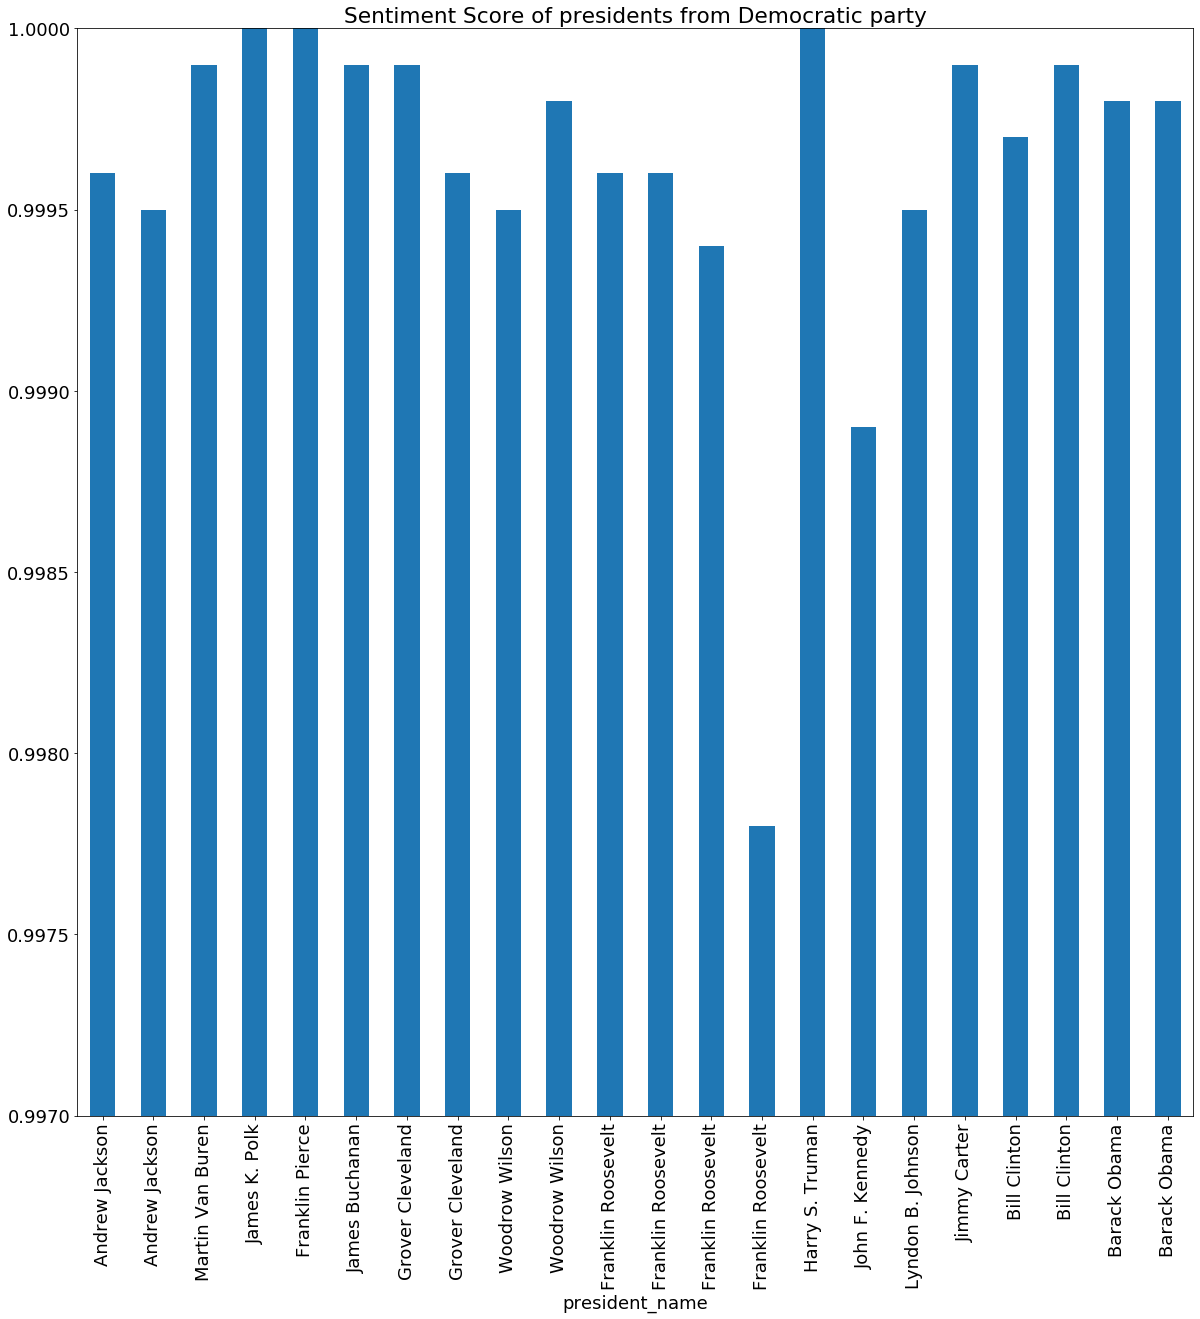

In [50]:
us_presidents_speeches[us_presidents_speeches['party_name']=='Democrat'].plot(kind='bar',x='president_name',y='sentiment_score')
plt.title("Sentiment Score of presidents from Democratic party")
plt.rcParams["figure.figsize"] = (20,10)
axes = plt.gca()
axes.set_ylim([0.9970,1])
plt.rcParams.update({'font.size': 18})
plt.legend().set_visible(False)

### Bar plot of sentiment score of presidents from all other parties.

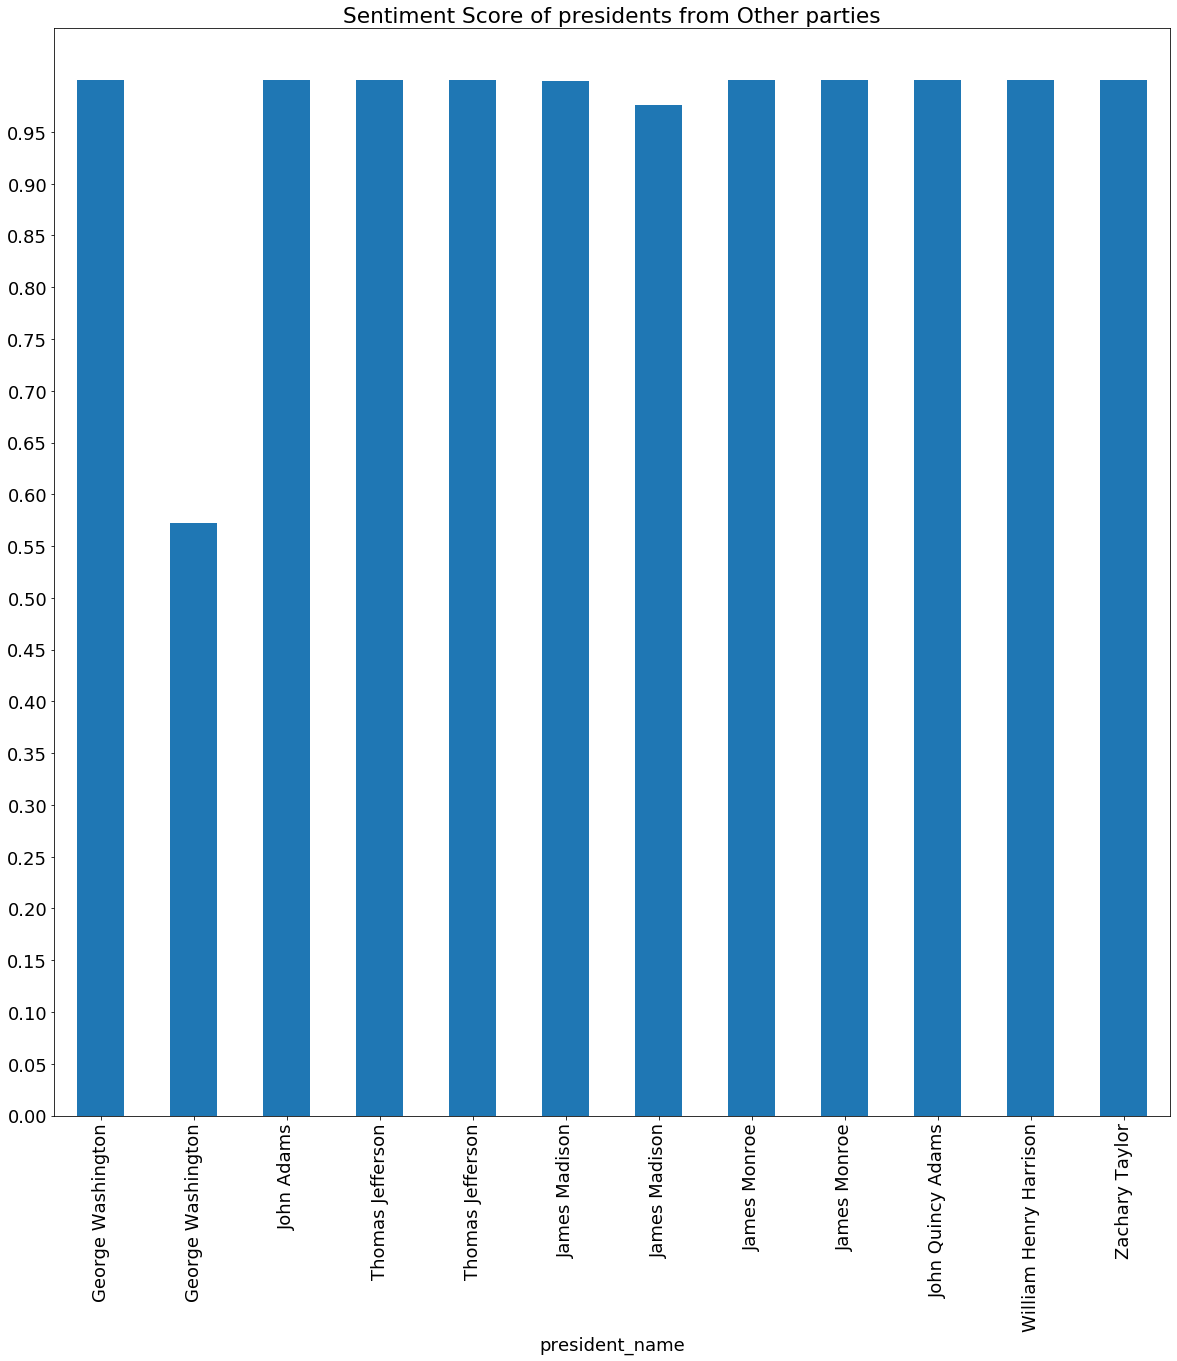

In [49]:
us_presidents_speeches[us_presidents_speeches['party_name']=='Other'].plot(kind='bar',x='president_name',y='sentiment_score')
plt.title("Sentiment Score of presidents from Other parties")
plt.rcParams["figure.figsize"] = (20,20)
axes = plt.gca()
plt.yticks(np.arange(0,1,0.05))
plt.rcParams.update({'font.size': 18})
plt.legend().set_visible(False)

#### Mean sentiment score of speeches given by presidents from democrat party is higher than other two groups.

In [27]:
print('Mean sentiment score of speeches given by US presidents from democrat party :')
print(us_presidents_speeches.loc[us_presidents_speeches['party_name'] =='Democrat']['sentiment_score'].mean())
print('Mean sentiment score of speeches given by US presidents from Republican party :')
print(us_presidents_speeches.loc[us_presidents_speeches['party_name'] =='Republican']['sentiment_score'].mean())
print('Mean sentiment score of speeches given by US presidents from Other party :')
print(us_presidents_speeches.loc[us_presidents_speeches['party_name'] =='Other']['sentiment_score'].mean())

Mean sentiment score of speeches given by US presidents from democrat party :
0.9996181818181821
Mean sentiment score of speeches given by US presidents from Republican party :
0.9177083333333335
Mean sentiment score of speeches given by US presidents from Other party :
0.9621583333333334


### Top three presidents with the highest positive sentiment  in Democrat Party

In [89]:
us_presidents_speeches.sort_values(['sentiment_score']).loc[us_presidents_speeches['party_name'] =='Democrat'][['president_name','sentiment_score']][-3:]

,president_name,sentiment_score
40,Harry S. Truman,1
16,Franklin Pierce,1
14,James K. Polk,1


### Top three presidents with the highest positive sentiment  in Republican Party

In [88]:
us_presidents_speeches.sort_values(['sentiment_score']).loc[us_presidents_speeches['party_name'] =='Republican'][['president_name','sentiment_score']][-3:]

,president_name,sentiment_score
30,William Howard Taft,1
25,Benjamin Harrison,1
34,Calvin Coolidge,1


### Top three presidents with the highest positive sentiment  in all other parties.

In [87]:
us_presidents_speeches.sort_values(['sentiment_score']).loc[us_presidents_speeches['party_name'] =='Other'][['president_name','sentiment_score']][-3:]

,president_name,sentiment_score
8,James Monroe,1
7,James Monroe,1
2,John Adams,1
